# Plotting with Seaborn

In [1]:
# jupyter magics
%matplotlib inline
%config IPCompleter.greedy=True

# multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Seaborn styles

In [14]:
def simple_plot():
    np.random.seed(100)
    data = np.random.normal(size=(20, 6)) 
    sns.boxplot(data=data)

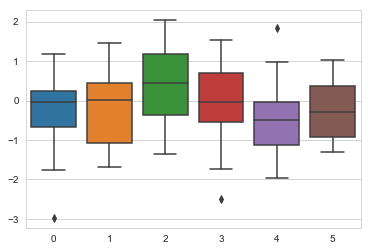

In [15]:
with sns.set_style("whitegrid"):
    simple_plot();

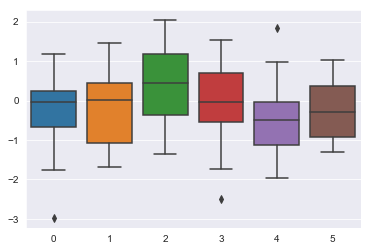

In [16]:
with sns.set_style("darkgrid"):
    simple_plot();

### Context allows tailoring of the plot scale

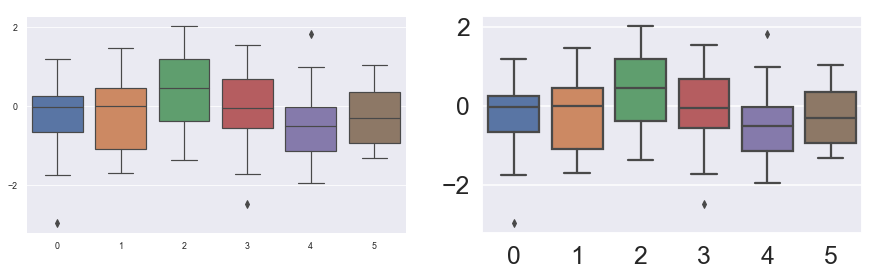

In [54]:
plt.figure(figsize=(15, 4));
sns.set_context("paper")
plt.subplot(121);
simple_plot();
sns.set_context("talk", font_scale=1.5)
plt.subplot(122);
simple_plot();

In [55]:
sns.set(style="darkgrid", context='talk')

## Data plotting

#### We will continue working with the fmri dataset of seaborn.
Load the data:

In [3]:
csv_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/fmri.csv')
csv_df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


### Figure-level and axes-level plots

Some plots, e.g. `FacetGrid`, `jointplot`, `catplot`, `lmplot` are **figure-level** plot, i.e. they create a new figure internally, figure size manipulation through `height` and `aspect` arguments.

Other plots, e.g. `violinplot`, `boxplot`, `swarmplot` are **axes-level** plots, i.e. they can use existing `plt` axes.

### Histogram plots

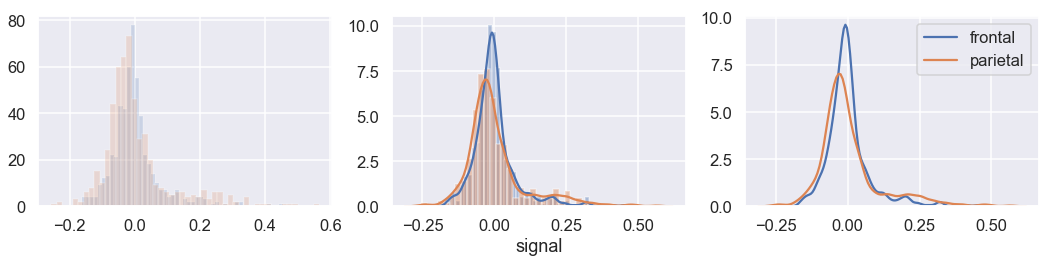

In [124]:
plt.figure(figsize=(15, 4));
plt.subplot(131);
plt.hist(csv_df['signal'][csv_df['region']=='frontal'].to_numpy(), 50, alpha=.2);
plt.hist(csv_df['signal'][csv_df['region']=='parietal'].to_numpy(), 50, alpha=.2);

plt.subplot(132);
sns.distplot(csv_df['signal'][csv_df['region']=='frontal']);
sns.distplot(csv_df['signal'][csv_df['region']=='parietal']);

plt.subplot(133);
sns.kdeplot(csv_df['signal'][csv_df['region']=='frontal'], label='frontal');
sns.kdeplot(csv_df['signal'][csv_df['region']=='parietal'], label='parietal');
plt.tight_layout();

### Faceted histograms

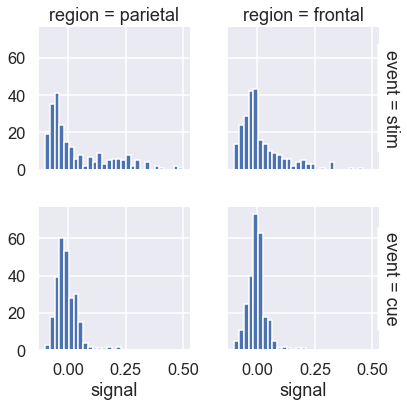

In [144]:
grid = sns.FacetGrid(csv_df, row="event", col="region", margin_titles=True)
grid.map(plt.hist, "signal", bins=np.linspace(-.1, .5, 30));

### Factor plots and bar plots

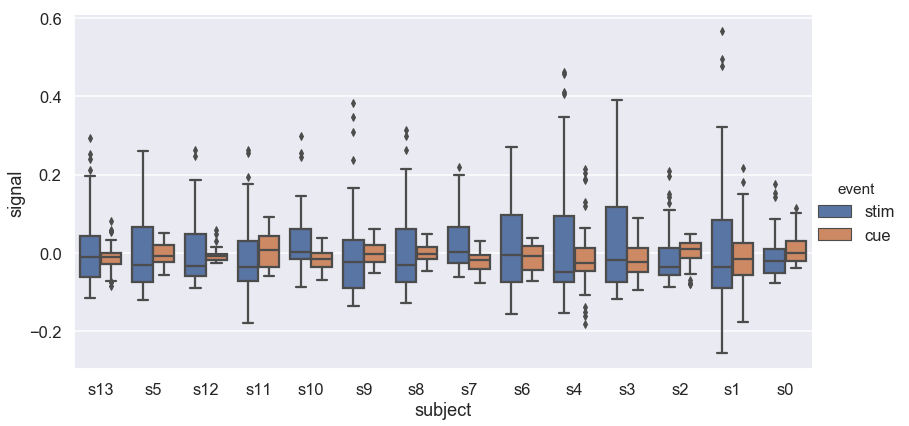

In [171]:
sns.catplot(data=csv_df, x="subject", y="signal", hue='event', kind="box", height=6.27, aspect=11.7/6.27);

### Density estimates, joint plots, hexplots

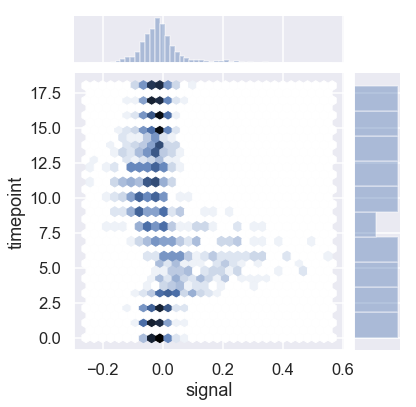

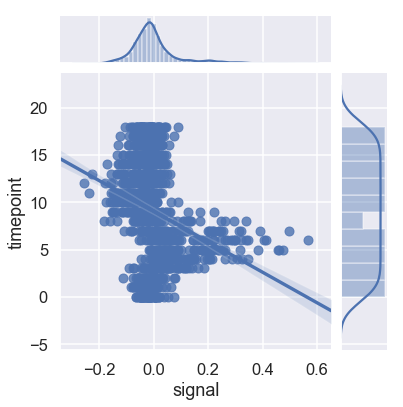

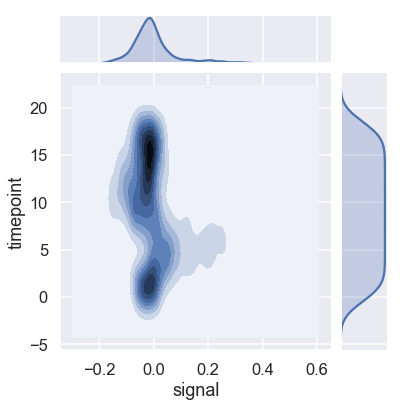

In [173]:
sns.jointplot(data=csv_df, x='signal', y="timepoint",kind='hex');
sns.jointplot(data=csv_df, x='signal', y="timepoint",kind='reg');
sns.jointplot(data=csv_df, x='signal', y="timepoint",kind='kde');

### Swarmplots, stripplots and boxplots

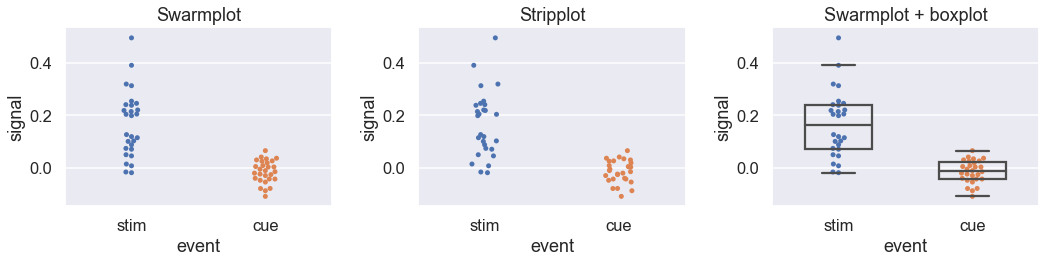

In [123]:
plt.figure(figsize=(15, 4));
plt.subplot(131);
sns.swarmplot(data=csv_df[(csv_df['timepoint']==7)], x='event', y='signal');
plt.title('Swarmplot');

plt.subplot(132);
sns.stripplot(data=csv_df[(csv_df['timepoint']==7)], x='event', y='signal');
plt.title('Stripplot');

plt.subplot(133);
ax=sns.swarmplot(data=csv_df[(csv_df['timepoint']==7)], x='event', y='signal', zorder=1);
sns.boxplot(data=csv_df[(csv_df['timepoint']==7)], x='event', y='signal', boxprops={'facecolor':'None', "zorder":10},
            width=.5, showfliers=False, whiskerprops={'linewidth':0}, ax=ax);
plt.title('Swarmplot + boxplot');

plt.tight_layout();

### Violin plots

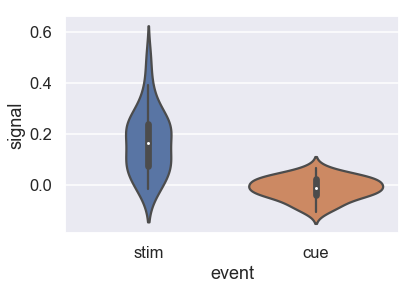

In [125]:
sns.violinplot(data=csv_df[(csv_df['timepoint']==7)], x='event', y='signal');